In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Extract the data
***

In [2]:
def Read_url_for_cat_dog(url):
    labels = []
    images = []
    for path,folder,files in os.walk(url):
        for file in files:                
            #Save de image
            try:
                img = Image.open(path+"/"+file)
                # Cambiar el tamaño de la imagen a una nueva dimensión de 300x300 píxeles
                img_resized = img.resize((150, 150))

                # Convertir la imagen redimensionada a una matriz NumPy
                img_array = np.array(img_resized)
                images.append(img_array)
                
                if path[-4:] == "dogs":
                    labels.append([0,1])        
                if path[-4:] =="cats":
                    labels.append([1,0])
            except:pass
            
    return labels,images

label,data=Read_url_for_cat_dog("/kaggle/input/cat-and-dog/training_set")        

In [3]:
np.array(label).shape[0] == np.array(data).shape[0]

True

In [4]:
np.array(data[0]).shape

(150, 150, 3)

## Created the model
***

In [5]:
import keras as kr

In [6]:
CNN = kr.Sequential([
    kr.layers.Conv2D(16,(5,5),input_shape=(150, 150, 3),padding="same"),
    kr.layers.MaxPool2D(3,3),
    
    kr.layers.Conv2D(10,(3,3),padding="same"),
    kr.layers.LeakyReLU(alpha=0.3),
    kr.layers.MaxPool2D(3,3),
    
    kr.layers.Conv2D(10,(3,3),padding="same"),
    kr.layers.LeakyReLU(alpha=0.3),
    
    kr.layers.MaxPool2D(2,2),
    kr.layers.Conv2D(3,(2,2),padding="same"),
    
    kr.layers.Flatten(),
    kr.layers.Dense(2,activation="sigmoid")

])
CNN.compile(optimizer='adam',loss='binary_crossentropy')
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 10)        1450      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 50, 10)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 10)        9

In [7]:
history=CNN.fit(np.array(data), np.array(label),epochs=5,verbose=2)

Epoch 1/5
251/251 - 17s - loss: 2.5247 - 17s/epoch - 69ms/step
Epoch 2/5
251/251 - 2s - loss: 0.8095 - 2s/epoch - 8ms/step
Epoch 3/5
251/251 - 2s - loss: 0.7148 - 2s/epoch - 8ms/step
Epoch 4/5
251/251 - 2s - loss: 0.6790 - 2s/epoch - 8ms/step
Epoch 5/5
251/251 - 2s - loss: 0.6603 - 2s/epoch - 8ms/step


In [8]:
y_test,x_test=Read_url_for_cat_dog("/kaggle/input/cat-and-dog/test_set")        

In [9]:
np.array(x_test).shape[0] == np.array(y_test).shape[0]

True

### Tested the model
***

Escribe un indice:  -123


1/1 [==============================] - 0s 21ms/step


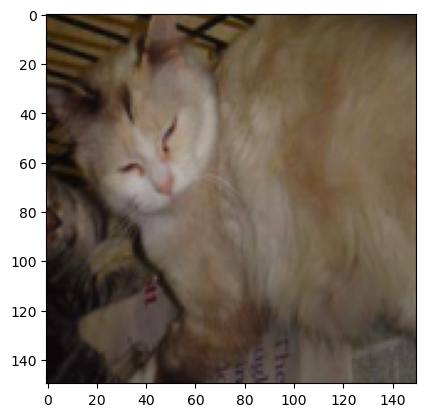

 probabilidad de que sea perro: 38.68255019187927%
 probabilidad de que sea gato: 61.68821454048157%


In [16]:
index =int(input("Escribe un indice: "))
imagen = np.array(x_test)[index]
y_predict = CNN.predict(np.array([imagen]))
plt.imshow(imagen)
plt.show()
print(f" probabilidad de que sea perro: {y_predict[0][-1]*100}%\n probabilidad de que sea gato: {y_predict[0][0]*100}%")

In [21]:
CNN.save("/kaggle/working/cat_dog.h5")

# Convert the model of .h5 to .json
***

In [17]:
! pip install tensorflowjs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 979.3 kB/s eta 0:00:00 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [22]:
! tensorflowjs_converter --input_format=keras /kaggle/working/cat_dog.h5 /kaggle/working/
